# **PHISHING** **DETECTION**



## **Load The Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('Phishing_Email.csv')
df.head()



,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


## **Data Pre Processing**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [ ]:
df.duplicated().sum()

0

Removing the Missing Values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()

,0
Unnamed: 0,0
Email Text,0
Email Type,0


## **Visualizing**

In [ ]:
email_type = df['Email Type'].value_counts()
email_type

,count
Email Type,
Safe Email,11322
Phishing Email,7312


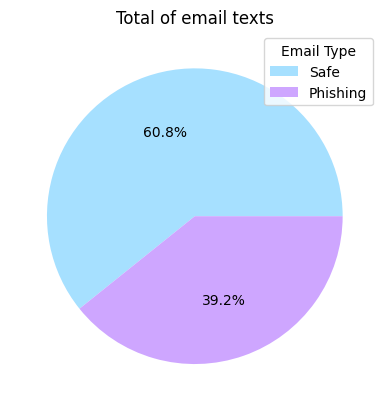

In [ ]:
email_type = df['Email Type'].value_counts()
plt.pie(email_type, colors=['#a6e0ff', '#cea6ff'], autopct='%1.1f%%')
plt.title('Total of email texts')
plt.legend(['Safe', 'Phishing'], title='Email Type')
plt.show()

### **WordCloud of Safe Texts**

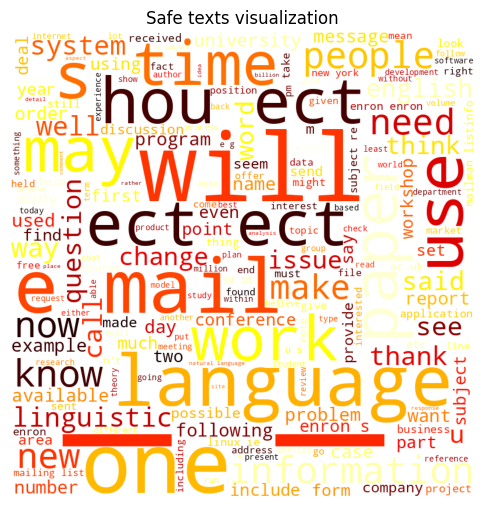

In [ ]:
safe_type = df[df['Email Type'] == 'Safe Email']['Email Text'].values
phishing_type = df[df['Email Type'] == 'Phishing Email']['Email Text'].values

wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='hot')

safe_type = ''.join(safe_type)
wordcloud.generate(safe_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Safe texts visualization')
plt.axis("off")
plt.show()

### **Word Cloud Of Phishing Text**

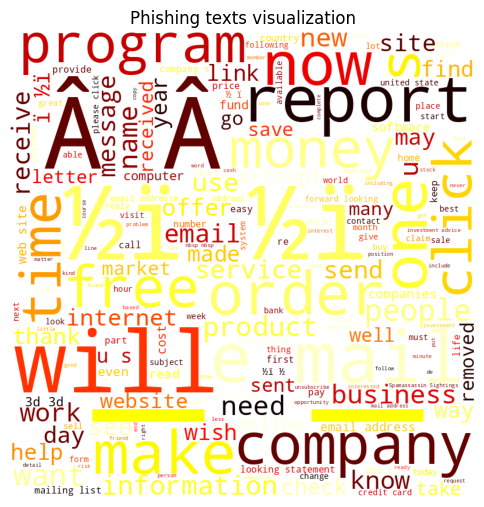

In [ ]:
phishing_type = ''.join([str(item) for item in phishing_type])

wordcloud.generate(phishing_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Phishing texts visualization')
plt.axis("off")
plt.show()

### **Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

tf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

feature_x = tf.fit_transform(df["Email Text"]).toarray()

y_tf = np.array(df['Email Type'])

x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

## **Implementing Logistic Regression Model**


accuracy from logistic regression:96.78 %
f1 score from logistic regression: 95.95 %
classification report : 
                 precision    recall  f1-score   support

Phishing Email       0.94      0.97      0.96      1457
    Safe Email       0.98      0.96      0.97      2270

      accuracy                           0.97      3727
     macro avg       0.96      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



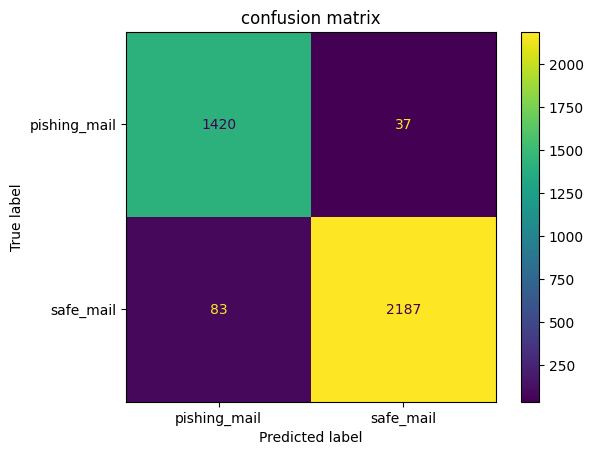

In [33]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)

# prediction
pred_lg = lg.predict(x_test)
# performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_test,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_test,pred_lg,pos_label='Phishing Email')*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_lg))

clf_lg = confusion_matrix(y_test,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

Testing The Model By Providing A Demo Email

In [30]:

new_email = ["Your account has been compromised. Please click here to verify."]

new_email_transformed = tf.transform(new_email)


predicted_class = lg.predict(new_email_transformed)


print("Predicted class:", predicted_class)

Predicted class: ['Phishing Email']


In [31]:
import joblib


joblib.dump(lg, 'phishing_model.pkl')
joblib.dump(tf, 'vectorizer.pkl')

['vectorizer.pkl']

In [32]:
from google.colab import files

# Download the model file
files.download('phishing_model.pkl')

# Download the vectorizer file
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>